<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter3/chapter3_7_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My drive/{}'. format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/pyml


# 3.7 k-최근접 이웃 : 게으른 학습 알고리즘
3장의 마지막 지도 학습 알고리즘 ** k-최근접 이웃 (K-Neareset Neighbor, KNN) ** 에 대해 알아보자.  

KNN은 전형적인 게으른 학습기(lazy learner)로서, 훈련 데이터에서 판별 함수(discriminative function)를 학습하는 대신 훈련 데이터셋을 메모리에 저장하므로 게으른 학습기라고 불림.

In [3]:
from utils.plot_decision_regions import plot_decision_boundary
from utils.load_data import load_iris_from_skl

In [4]:
# load ,split, standardization
from utils.load_data import load_iris_from_skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X,y = load_iris_from_skl()
X = X[:,[2,3]]

X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state = 1, test_size = 0.3, shuffle = True, stratify = y
)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

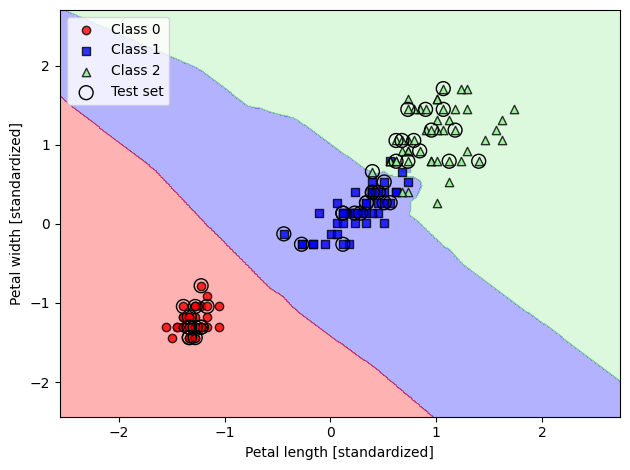

In [6]:
# 유클리드 거리 측정 방식을 사용한 사이킷런의 KNN 모델
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_boundary(X_combined_std, y_combined, classifier = knn, test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()